# Úkol č. 4 - regrese (do 14. ledna, nejpozději však před zkouškou)

  * Cílem tohoto úkolu je vyzkoušet si řešit regresní problém na reálných (ale celkem vyčištěných) datech.
  
> **Nejdůležitější na úkolu je to, abyste udělali vše procesně správně: korektní rozdělení datasetu, ladění hyperparametrů, vyhodnocení výsledků atp.**

## Dataset

  * Zdroj dat je zde: https://data.world/uci/online-news-popularity.
  * Popis datasetu najdete v souboru `data_description.txt`.
  

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Proveďte základní průzkum dat a příp. vyhoďte nezajímavé příznaky.
  * Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:
    * K měření chyby použijte `median_absolute_error`, bezpracné použití lineární regrese dává chybu zhruba 1700, Vaším úkolem je toto zlepšit.
    * Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
    * Experimentujte se standardizací/normalizací dat.
    * Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +4 body) Použijte i jiné metody než je lineární a hřebenová regrese.
  * (až +4 body) Získejte opravdu dobré výsledky (ve srovnání s Vašimi kolegy).

In [2]:
import pandas as pd
from sklearn.metrics import median_absolute_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn import datasets, linear_model

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PowerTransformer
from sklearn.linear_model import BayesianRidge, LinearRegression, Ridge, Lasso

from IPython.display import display

from sklearn.preprocessing import minmax_scale

from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

from sklearn.linear_model import BayesianRidge, LinearRegression, Ridge, Lasso
import sklearn.metrics as metrics
from time import time

from sklearn import manifold
from sklearn import decomposition

import warnings
warnings.filterwarnings('ignore') # haha. I figured out solution for all warings.

# 1. Simple regression
* We have about 60 features, thats a lot (I guess?)
* Visualisation of the data is sort of hard
* We'll do simple regression at first
* We'll perform linear and also biased ( laso and ridge)

In [3]:
def load_data(standartize = False):
    df = pd.read_csv('data.csv')
    df = df.drop(columns='url')
    df.columns = [col.strip() for col in df.columns]
    X, X_test, y, y_test = train_test_split(df.drop(columns = ['shares']), df['shares'], test_size=0.25)
    
    #  Standartize data
    if standartize:
        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
        X_test = scaler.transform(X_test)
        X = pd.DataFrame(X)
        X_test = pd.DataFrame(X_test)
        
    return (X, X_test, y, y_test)


def get_model(model_name, params):
    if(model_name == 'linear'):
        return linear_model.LinearRegression(**params)
    elif(model_name == 'ridge'):
        return linear_model.Ridge(**params)
    elif(model_name == 'lasso'):
        return linear_model.Lasso(**params)

# store train and test acc, intercepts and coef for model
class Res:
    def __init__(self, train_acc, test_acc, inter, coef):
        self.train_acc = train_acc
        self.test_acc = test_acc
        self.inter = inter
        self.coef = coef


# fit model, test it and collect all data        
def get_results(model, X,y, X_test, Y_test):
    model.fit(X, y)
    coef = model.coef_
    inter = model.intercept_
    train = metrics.median_absolute_error(y, model.predict(X))
    test = metrics.median_absolute_error(y_test, model.predict(X_test))
    return(train, test, inter, coef)

In [15]:
# prepare data
Xs, Xs_test, y, y_test = load_data(standartize=True)
X, X_test, _, _ = load_data(standartize=False)


# prepare models
param_comb = ParameterGrid({'fit_intercept': [True]})
models = {'lasso': param_comb, 'ridge': param_comb, 'linear': param_comb}

# list for store of results
results = {}

# iterate for models and their params and cacluate results for both standartized and unstadartized data
for model_name, param_c in models.items():
     for params in param_c:   
        model = get_model(model_name, params)
        not_std = Res(*get_results(model, X, y, X_test, y_test))
        std = Res(*get_results(model, Xs, y, Xs_test, y_test))
        results[model_name] = (not_std, std)
        #results[model_name+'_standatized'] = 

,train,test,train_std,test_std,i,i_std
lasso,2133.729859,2144.243163,1682.897811,1688.646203,3682.959126,3387.873171
ridge,2128.628882,2142.282372,1688.876481,1702.843970,3701.758189,3387.873171
linear,2127.543649,2142.710297,1688.493802,1712.876754,3694.429186,3387.337986


,lasso_std,ridge_std,linear_std
count,59.000000,59.000000,5.900000e+01
mean,1.590514,4.662474,-3.576186e+14
std,364.607446,1310.898336,2.188358e+15
min,-1050.054426,-6180.121040,-9.051977e+15
25%,-133.783191,-194.075173,-3.855156e+02
50%,20.044617,15.003060,1.279575e+01
75%,129.806632,151.532781,3.227810e+02
max,1900.536717,7230.183797,9.713997e+15


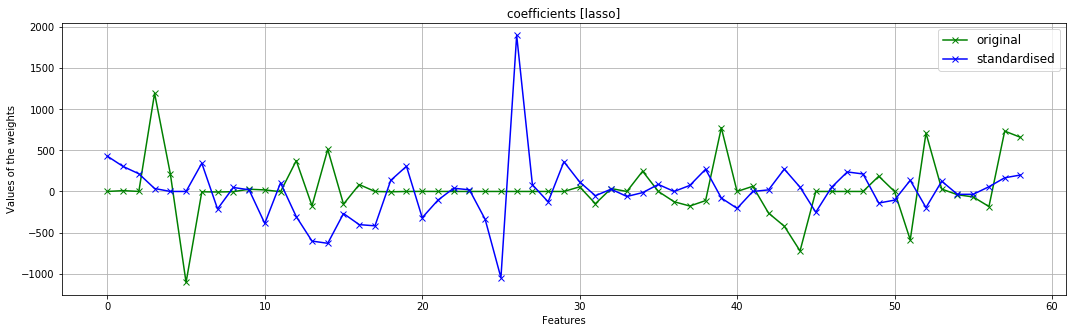

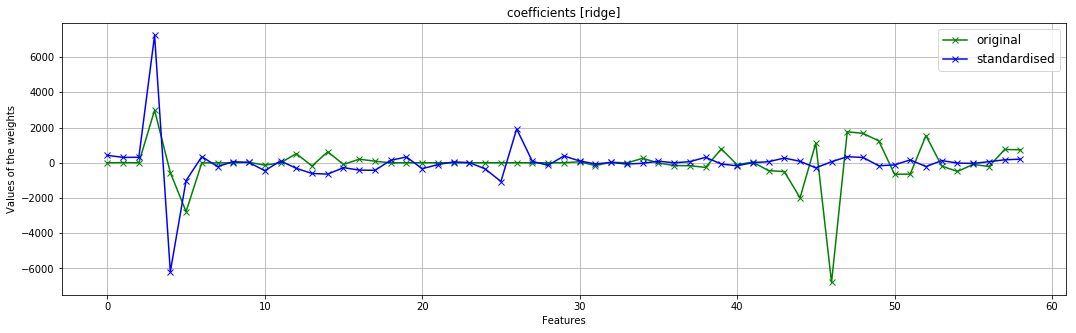

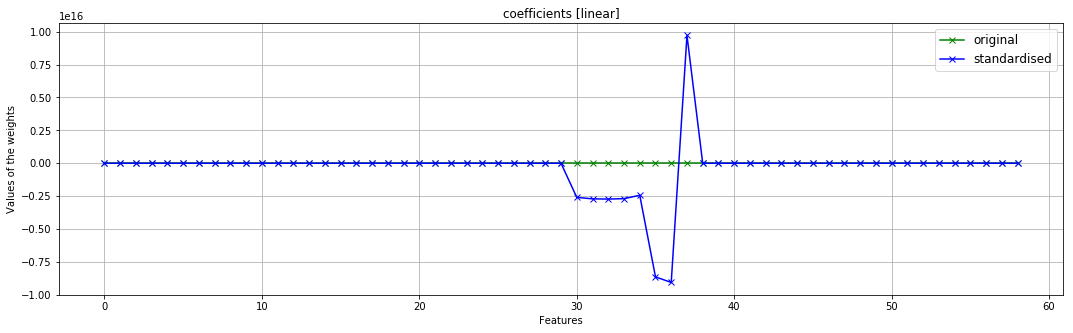

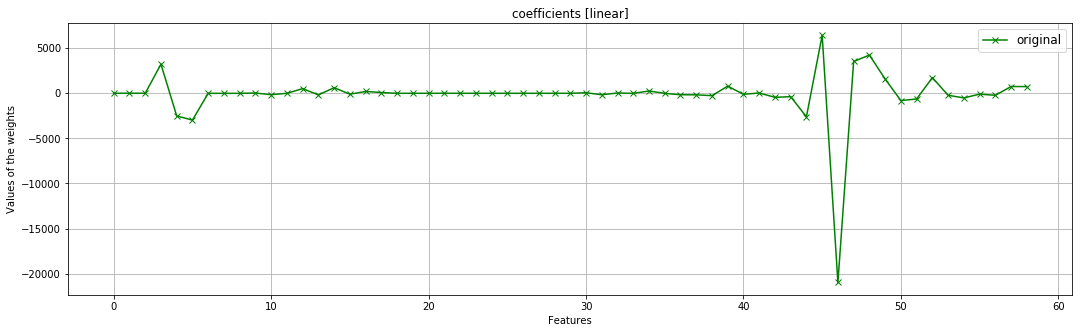

In [ ]:
# PLOT 

df_res = pd.DataFrame(columns= ["train", "test", "train_std", "test_std", "i", "i_std"])

df_list = pd.DataFrame()
# plot all results
for model_name, res in results.items():
    res_non_std, res_std = res
    
    lw = 2
    plt.figure(figsize=(18, 5))
    plt.grid()
    plt.title("coefficients [{}]".format(model_name))
    
    plt.plot(res_non_std.coef, 'gx-',   label='original')
    plt.plot(res_std.coef, 'bx-',   label='standardised')
    plt.xlabel("Features")
    plt.ylabel("Values of the weights")
    plt.legend(loc="best", prop=dict(size=12))
    
    dictionary_row = {'train' : res_non_std.train_acc, 
            'test' : res_non_std.test_acc, 
            'train_std' :res_std.train_acc, 
            'test_std' : res_std.test_acc, 
            'i': res_non_std.inter, 
            'i_std':res_std.inter }
    df_res.loc[model_name] = dictionary_row

    df_list[model_name+'_std'] = res_std.coef

# plot linear non std on its own    
res = results['linear']
res_non_std, res_std = res
lw = 2
plt.figure(figsize=(18, 5))
plt.grid()
plt.title("coefficients [{}]".format(model_name))
plt.plot(res_non_std.coef, 'gx-',   label='original')
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

display( df_res.head() )
display(df_list.describe())

## 1.1 Result
* Ok we see, that standartised features are obviously better than non standartised ones
* we've improved from 2150 msa to 1700 with standartised features
* We also see that only low number of features can be viewed as important
* Based on observations of the result we can simply delete up to 50% of features
* But better way of reducing dimensionality than would PCA or Manifold learning which we'll do in next chapetrs

# 2. Dimensionality Reduction - PCA
* Common, simple and fast way of dimensionality reduction
* It is linear dimensionality reduction
* I belive it can work pretty well, because from feature description we can know, that lot of features are lineary precomputed from others
* We'll try different number of features (from 5 to 59) eg. remove up to 55 features
* We'll plot all the results

,laso_train,laso_test,ridge_train,ridge_test,linear_train,linear_test
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1731.959987,1732.528536,1732.207231,1732.475173,1732.171846,1732.527820
std,55.532363,58.962128,55.106584,58.735843,55.145832,58.696415
min,1653.950098,1624.773790,1656.484958,1626.615701,1656.405270,1626.547175
25%,1701.946700,1695.667438,1701.139399,1696.899012,1701.135311,1696.995671
50%,1721.341484,1722.434861,1720.887187,1721.900727,1720.916756,1721.879295
75%,1741.471618,1751.475771,1741.304658,1751.337981,1741.335607,1751.338884
max,1889.165742,1891.657209,1888.659122,1891.386363,1888.660716,1891.385611


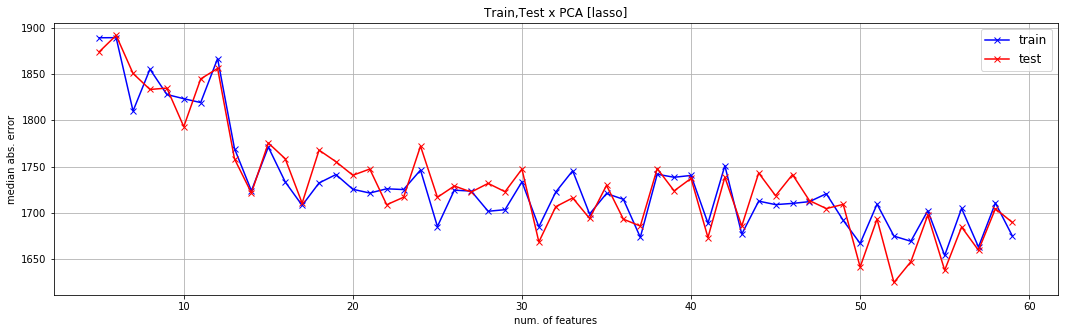

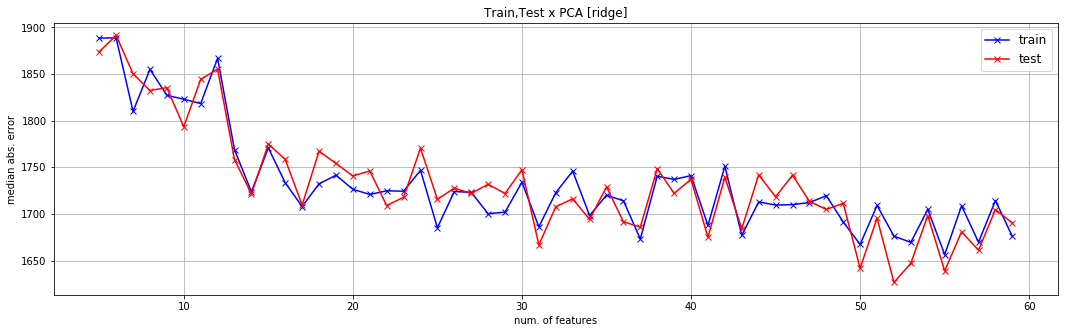

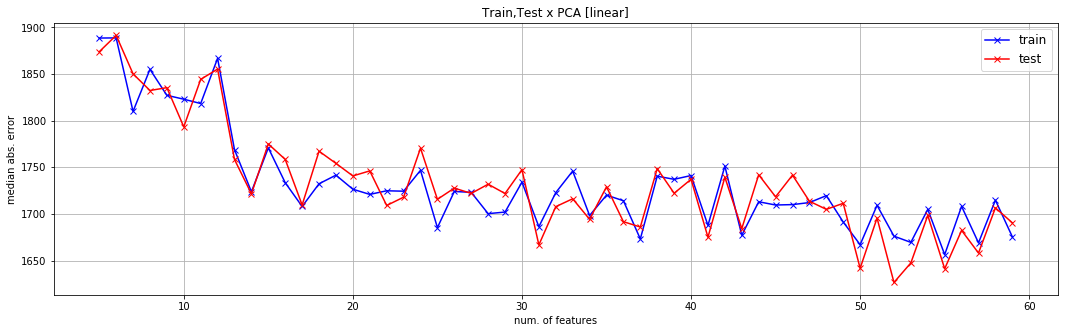

In [102]:
all_resuts = {}

class Train_test():
    def __init__(self, train_acc, test_acc, inter, coef):
        self.train_acc = train_acc
        self.test_acc = test_acc
        self.inter = inter
        self.coef = coef
        
for i in range(5,60):
    X, X_test, y, y_test = load_data(standartize=True)

    # first lets do PCA
    pca = decomposition.PCA(n_components=i)
    pca.fit(X)
    X = pca.transform(X)
    X_test = pca.transform(X_test)

    # COMPUTE
    # iterate for models and their params and cacluate results for both standartized and unstadartized data
    for model_name, param_c in models.items():
         for params in param_c:   
            model = get_model(model_name, params)
            std = Res(*get_results(model, X, y, X_test, y_test))
            if model_name in all_resuts:
                all_resuts[model_name].train_acc.append(std.train_acc)
                all_resuts[model_name].test_acc.append(std.test_acc)
                all_resuts[model_name].inter.append(std.inter)
                all_resuts[model_name].coef.append(std.coef)
            else:
                all_resuts[model_name] = Train_test([std.train_acc], [std.test_acc], [std.inter], [[std.coef]])  
                
my_dic = {}
for key, val in all_resuts.items():
    lw = 2
    plt.figure(figsize=(18, 5))
    plt.grid()
    plt.title("Train,Test x PCA [{}]".format(key))
    plt.plot(range(5,60),val.train_acc, 'bx-',   label='train')
    plt.plot(range(5,60),val.test_acc, 'rx-',   label='test')
    plt.xlabel("num. of features")
    plt.ylabel("median abs. error")
    plt.legend(loc="best", prop=dict(size=12))
    plt.plot()

info_df = pd.DataFrame({'laso_train':all_resuts['lasso'].train_acc, 
                        'laso_test':all_resuts['lasso'].test_acc, 
                        'ridge_train':all_resuts['ridge'].train_acc,
                        'ridge_test':all_resuts['ridge'].test_acc,
                        'linear_train':all_resuts['linear'].train_acc,
                        'linear_test':all_resuts['linear'].test_acc})
info_df.describe()

### 2.1.1 Best results 1
* We've printed best results of the models
* And plotted median squared of error based on number of features generated by PCA
* We can see that all three models have very similiar results (no, they are not the same even it may look like!)
* Based on the 'elbows' we can see some optional number of features
* Let's look at the lovest error

In [103]:
print('laso   min:{}, cnt_features:{}'.format( info_df.laso_test.min(), info_df.laso_test.idxmin() + 5 ) )
print('ridge  min:{}, cnt_features:{}'.format( info_df.ridge_test.min(), info_df.ridge_test.idxmin() + 5 ) )
print('linear min:{}, cnt_features:{}'.format( info_df.linear_test.min(), info_df.linear_test.idxmin() + 5 ) )

laso   min:1624.773790158994, cnt_features:52
ridge  min:1626.6157007129405, cnt_features:52
linear min:1626.5471750163042, cnt_features:52


### 2.1.2 Best Result 2 (...contined)
* ... Based on train test split we are usually geting best result at 14, 25, 52 or 54 features
* that's big difference between number of the features
* that would mean, that projection is maybe not the best way of the reducing dim

In [122]:
X, X_test, y, y_test = load_data(standartize=True)

# first lets do PCA
i = 25
pca = decomposition.PCA(n_components=i)
pca.fit(X)
X = pca.transform(X)
X_test = pca.transform(X_test)
for i, explained_variance_ratio in enumerate(pca.explained_variance_):
    print("var:" + str(i + 1) + "importance[","%.1f]" % explained_variance_ratio, '\t percentage: ', "%.2f" % pca.explained_variance_ratio_[i])

var:1importance[ 4.9] 	 percentage:  0.08
var:2importance[ 4.1] 	 percentage:  0.07
var:3importance[ 3.6] 	 percentage:  0.06
var:4importance[ 3.0] 	 percentage:  0.05
var:5importance[ 2.8] 	 percentage:  0.05
var:6importance[ 2.6] 	 percentage:  0.04
var:7importance[ 2.5] 	 percentage:  0.04
var:8importance[ 2.3] 	 percentage:  0.04
var:9importance[ 2.1] 	 percentage:  0.04
var:10importance[ 2.1] 	 percentage:  0.04
var:11importance[ 2.0] 	 percentage:  0.03
var:12importance[ 1.9] 	 percentage:  0.03
var:13importance[ 1.7] 	 percentage:  0.03
var:14importance[ 1.4] 	 percentage:  0.02
var:15importance[ 1.4] 	 percentage:  0.02
var:16importance[ 1.2] 	 percentage:  0.02
var:17importance[ 1.2] 	 percentage:  0.02
var:18importance[ 1.2] 	 percentage:  0.02
var:19importance[ 1.2] 	 percentage:  0.02
var:20importance[ 1.2] 	 percentage:  0.02
var:21importance[ 1.1] 	 percentage:  0.02
var:22importance[ 1.1] 	 percentage:  0.02
var:23importance[ 1.0] 	 percentage:  0.02
var:24importance[ 0.

* Those results are also not the best

### 2.1.3 Best results 3 (...continued)

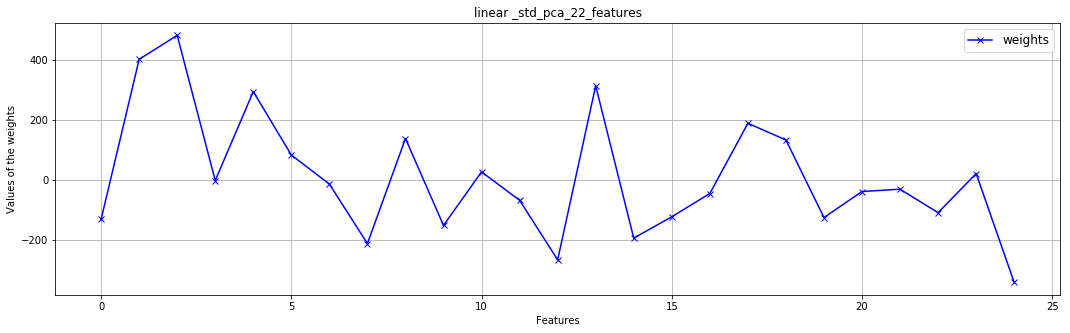

In [123]:
# compute best model with PCA params
model_name='linear'
params = {'fit_intercept':True}
model = get_model(model_name, params)
model_res = Res(*get_results(model, X, y, X_test, y_test))
# and plot it
lw = 2
plt.figure(figsize=(18, 5))
plt.grid()
plt.title(model_name+" _std_pca_22_features")

plt.plot(model_res.coef, 'bx-',   label='weights')
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

* On the other hand we can see that most of the features are used up to theirs potential

# 3. Manifold learning
* We'll try some manifold training techiques
* First we'll do LLE (which we known from lecture)
* Than we'll also try other methods, which we can find in scikit library
* **Our dataset is big (and my old two core 4GB ram netebook is s...) that's why we'll try these methods on some subset of original dataset**
* also keep in mind that I tried:
    * First reduce number of features with PCA (to 14 features) and then use manifold 
    * The problem was, that my computer was still unable to compute mafiold for more than 5 categories
    * That means those results were not good enough
    * At the end of the chapter i'll show some results computed on school computers
* to sum it: whole chapter 3 is more or less like an example than anything else...

In [ ]:
# we use y as color
_, X_new, _, color = load_data(standartize=True) # returns randomly sampled and standartized 25% of the dataset
n_neighbors = 10
n_components = 2 # we also experiment with number 3

## 3.1 LLE
* we try different methods supported by scikit of how to decompose matrix

standard: 49 sec
modified: 53 sec


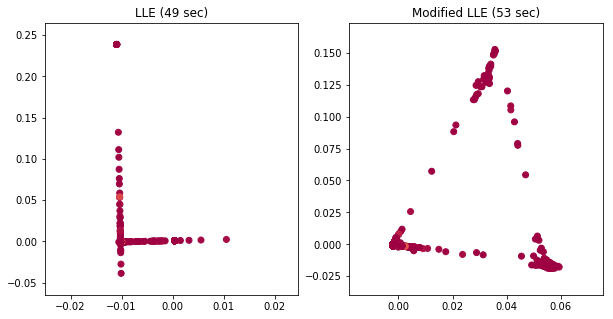

In [94]:
methods = ['standard', 'modified']
labels = ['LLE',   'Modified LLE']
plt.figure(figsize=(10,5))
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X_new)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
    # Plot
    plt.subplot(1, 2,i+1)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
plt.show()

* I belive that we are taking in account too little neigbours, let's try 50 (...because why not!)

standard: 1.4e+02 sec
modified: 1.4e+02 sec


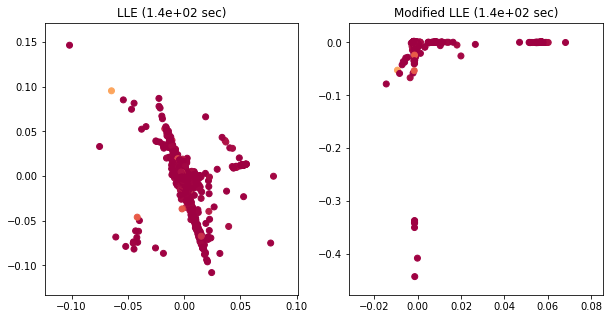

In [95]:
methods = ['standard', 'modified']
labels = ['LLE',   'Modified LLE']
plt.figure(figsize=(10,5))
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(50, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X_new)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
    # Plot
    plt.subplot(1, 2,i+1)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
plt.show()

* last but not least, lets try 100...

standard: 1.3e+02 sec
modified: 1.6e+02 sec


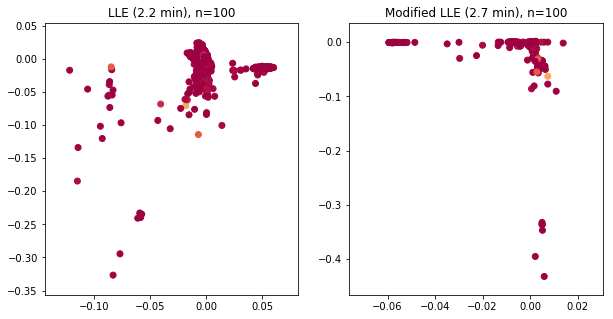

In [96]:
methods = ['standard', 'modified']
labels = ['LLE',   'Modified LLE']
plt.figure(figsize=(10,5))
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(100, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X_new)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
    # Plot
    plt.subplot(1, 2,i+1)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g min), n=100" % (labels[i], (t1 - t0)/60 ))
plt.show()

* Ok not much of a difference. Only axis are inverted (that obviously can happens)

## 3.2 Isomap
#### 3.2.1 k=2

------------------------
Isomap: 64 sec
------------------------


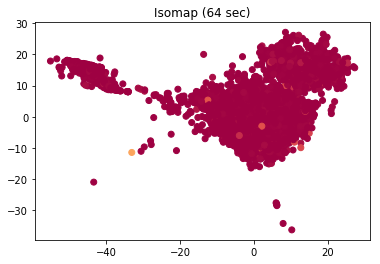

In [38]:
print("------------------------")
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X_new)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
print("------------------------")

#### 3.2.2 k=3

------------------------


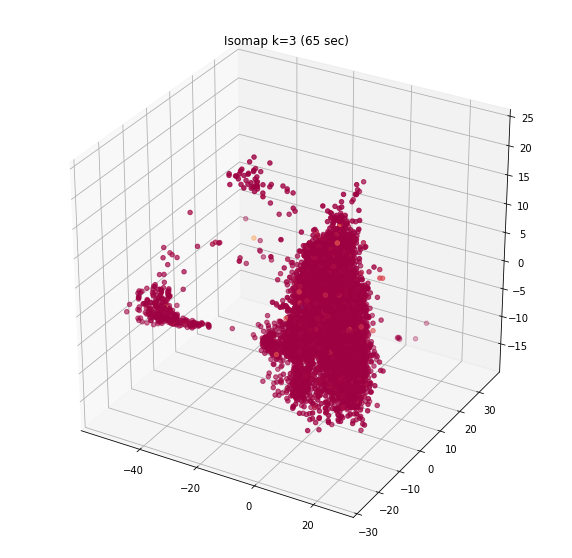

In [87]:
t0 = time()
Y = manifold.Isomap(n_neighbors, 3).fit_transform(X_new)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(10,10))
colr = minmax_scale(color)
ax = fig.add_subplot(111,  projection='3d')
ax.scatter(Y[:, 0], Y[:, 1],  Y[:, 2] ,c=colr, cmap=plt.get_cmap('Spectral'))
plt.title("Isomap k=3 (%.2g sec)" % (t1 - t0))
print("------------------------")

## 3.3 MDS
#### 3.3.1 k=2

MDS: 1.2e+02 sec
------------------------


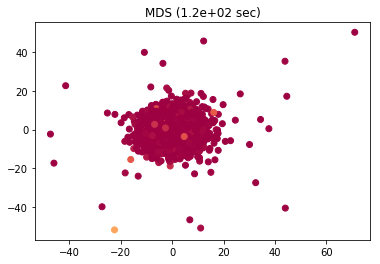

In [70]:
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X_new)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
print("------------------------")

#### 3.3.2 k=3

MDS: 1.2e+02 sec


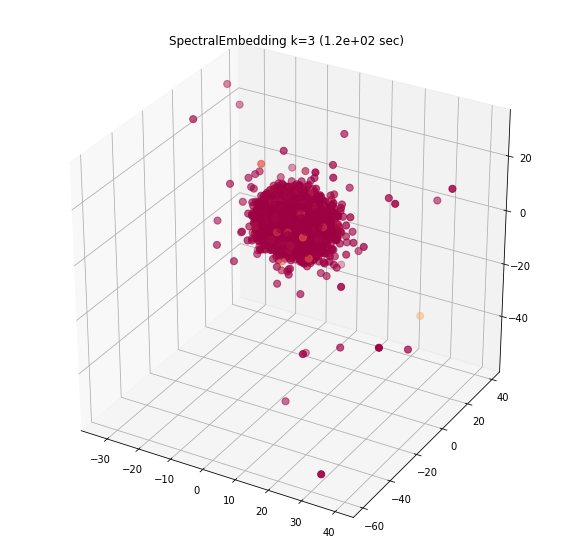

In [84]:
t0 = time()
mds = manifold.MDS(3, max_iter=100, n_init=1)
Y = mds.fit_transform(X_new)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
# plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,  projection='3d')
ax.scatter(Y[:, 0], Y[:, 1],  Y[:, 2], s=50, c=color, cmap=plt.get_cmap('Spectral'))
plt.title("SpectralEmbedding k=3 (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

## 3.4 SpectralEmbedding
#### 3.4.1 k=2

SpectralEmbedding: 32 sec
------------------------


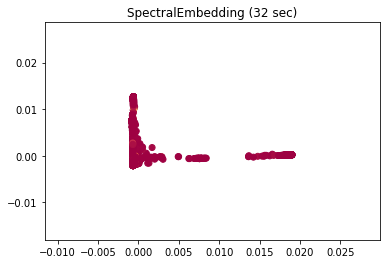

In [71]:
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X_new)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
# plot
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
print("------------------------")

#### 3.4.2 k=3

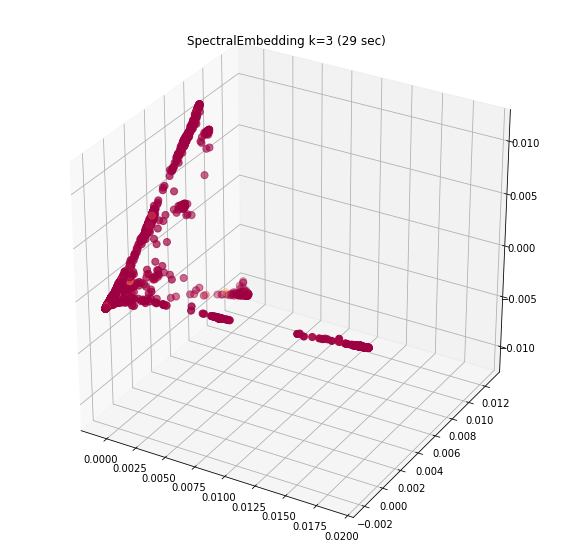

In [83]:
t0 = time()
se = manifold.SpectralEmbedding(n_components=3,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X_new)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
# plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,  projection='3d')
ax.scatter(Y[:, 0], Y[:, 1],  Y[:, 2], s=50, c=color, cmap=plt.get_cmap('Spectral'))
plt.title("SpectralEmbedding k=3 (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

## 3.5 t-SNE
#### 3.5.1 k=2

t-SNE: 1e+02 sec


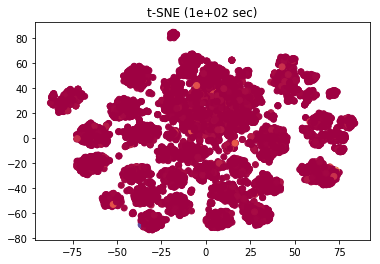

In [73]:
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X_new)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

#### 3.5.1 k=3

------------------------
t-SNE: 5.2e+02 sec


<Figure size 720x720 with 0 Axes>

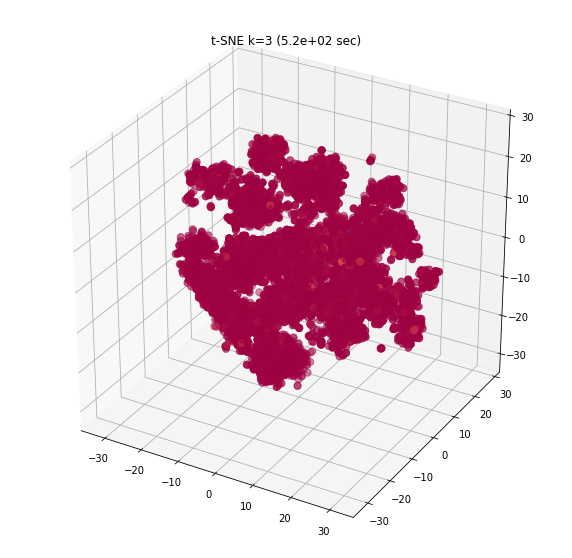

In [88]:
print("------------------------")
t0 = time()
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
Y = tsne.fit_transform(X_new)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(10,10))
colr = minmax_scale(color)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,  projection='3d')
ax.scatter(Y[:, 0], Y[:, 1],  Y[:, 2], c=color, s=50, cmap=plt.get_cmap('Spectral'))
plt.title("t-SNE k=3 (%.2g sec)" % (t1 - t0))
plt.axis('tight')

plt.show()

## 3.6.1 Results 1
* We can see that two features are not enough
* adding third won't add any info, because variance of features is almost only in two dim
* I did't played with number of neighbours much (usually n=10), because runtimes are **inasane**
* Least but not last (for the peace in my mind), I'll try to compute higher number of components...

## 3.6.2 Resluts 2
* I tried to compute something at school computers using whole train set (75% data)
* It took quite some time here i have some results from logfiles

* Isomap
  * n=51, k=5, time=24.49 min
    * model=ridge,  train=2057.21, test=2017.12
    * model=linear, train=2057.21, test=2017.12
  * n=51 k=10 [memory error]
  
* LLE
  * n=51, k=5, time=54.58 min
    * model=ridge,  n=50, k=5, train=2187.81, test=2191.39
    * model=linear, n=50, k=5, train=2164.59, test=2169.15
  * n=51, k=10, time=30.28 min
    * model=ridge,  n=50, k=10, train=2100.45, test=2085.80
    * model=linear, n=50, k=10, train=2099.23, test=2100.01
  * n=51, k=15, time=30.18 min
    * model=ridge,  n=50, k=15, train=2082.78, test=2072.10
    * model=linear, n=50, k=15, train=1968.60, test=1949.89
  * n=51, k=20, time=30.18 min
    * model=ridge,  n=50, k=20, train=2053.22, test=2043.97
    * model=linear, n=50, k=20, train=1934.37, test=1922.31
  * n=51, k=30, time=30.097 min
     * model=ridge, n=50, k=30,  train=2101.41, test=2097.77
     * model=linear, n=50, k=30, train=2001.01, test=1998.19
  * n=51, k=35, time=30.16 min
     * model=ridge, n=50,  k=35, train=2096.80, test=2093.98
     * model=linear, n=50, k=35, train=1995.37, test=1990.49

* We can see, that even we tried really hard, result were bad...

# 4. Working with PCA output
* Ok to finish this homework before end of 2019, we'll continue with output from PCA (25)
* We'll do gradient descent, we'll try to tune some hyperparams...
* We'll use 4 fold cross validation ( 4 for performace ! :-D )

In [36]:
def load_data(standartize = False):
    df = pd.read_csv('data.csv')
    df = df.drop(columns='url')
    df.columns = [col.strip() for col in df.columns]
    X, X_test, y, y_test = train_test_split(df.drop(columns = ['shares']), df['shares'], test_size=0.25)
    
    #  Standartize data
    if standartize:
        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
        X_test = scaler.transform(X_test)
        X = pd.DataFrame(X)
        X_test = pd.DataFrame(X_test)
        
    return (X, X_test, y, y_test)



# Cross validation
def cross_val(X, Y, folds, model, metric_func):
    
    kf = KFold(n_splits=folds, shuffle=False) 
    
     # e1 .. ek acc results
    test_acc_results = []
    train_acc_results = []

    # create K-fold cross validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        # train model
        model.fit(X_train, Y_train)
        
        # measure model
        train_acc_results.append( metric_func(Y_train, model.predict(X_train)))
        test_acc_results.append( metric_func(Y_test, model.predict(X_test)))
    
    # return mean of metric
    return (np.array(train_acc_results).mean(), np.array(test_acc_results).mean())

# Result return
class ModelResults:
    def __init__(self, cv_train_acc, cv_test_acc, holdout_acc):
        self.cv_train_acc = cv_train_acc
        self.cv_test_acc = cv_test_acc
        self.holdout_acc = holdout_acc

def get_model_old(model_name, params):
    if(model_name == 'linear_regression'):
        return linear_model.LinearRegression(**params)
    elif(model_name == 'ridge_regression'):
        return linear_model.Ridge(**params)
    elif(model_name == 'stochastic_gradient_descent'):
        return linear_model.SGDClassifier(**params)

# Tune Hyperparams !
def crosval_train(model_name, X, Y, X_holdout, Y_holdout, param_comb, num_of_folds, metric, greater):
    crossval_train_acc = []
    crossval_test_acc = []
    
    # for all hyper parametters
    for params in param_comb:   
        model = get_model_old(model_name, params)
        train_acc, test_acc = cross_val(X, Y,num_of_folds,model, metric)  
        crossval_test_acc.append(test_acc)
        crossval_train_acc.append(train_acc)
        
    # find best hyper parameters
    if greater:
        best_params = param_comb[np.argmax(crossval_test_acc)]
    else:
        best_params = param_comb[np.argmin(crossval_test_acc)]
    
    print(best_params)   
    
    # train on best hyperparams and measure holdout acc
    model = get_model_old(model_name, best_params)
    model.fit(X,Y)
    holdout_acc = metric(Y_holdout, model.predict(X_holdout))

    return ModelResults(crossval_train_acc, crossval_test_acc, holdout_acc)

# simple plot
def my_plot(result, plotname):
    fig = plt.figure(figsize=(20,6))
    plt.plot(result.cv_train_acc,'or-')
    plt.plot(result.cv_test_acc,'ob-')
    plt.plot([0,len(result.cv_test_acc)], [result.holdout_acc,result.holdout_acc],'g-')
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')
    plt.legend(['train_acc_mean', 'test_acc_mean','houdlout_acc'])
    plt.title(plotname, fontsize=14, fontweight='bold')
    return fig

* We've prepared our crossvalidation...
* **...and now, lets do it**

In [ ]:
######################################
# DATA
X, X_test, y, y_test = load_data(standartize=True)

# PCA ################################
i = 25
pca = decomposition.PCA(n_components=i)
pca.fit(X)
X = pca.transform(X)
X_test = pca.transform(X_test)
######################################

X = pd.DataFrame(X)
X_test = pd.DataFrame(X_test)

# k flod params and metric###############
num_fold = 4
metric = metrics.median_absolute_error
greater = False
##########################################

# where to save results
models_results = {}
results_to_plot = {}

# # Linear Regression
# model_name = 'linear_regression'    
# param_comb = ParameterGrid({'fit_intercept': [True], 'normalize':[False]})

# result = crosval_train(model_name, X, y, X_test, y_test, param_comb, num_fold, metric, greater)
# results_to_plot[model_name] = result
# models_results[model_name] = {'acc': result.holdout_acc, 'params' : param_comb[np.argmax(result.cv_test_acc)]}


# stochastic_gradient_descent

# gradient descent linear regression 
#lrates = [.5, .1, .01, .001, .0001]
#niterations = [25000, 50000, 150000]

model_name = 'stochastic_gradient_descent'  
#loss=['hinge', 'log', 'squared_hinge']
loss=['hinge']
#penalty = [ 'l2', 'l1', 'elasticnet']
penalty = [ 'l2']
max_iter = [10, 100, 1000]
lrates = ['optimal']
param_comb = ParameterGrid({'loss': loss, 'max_iter' : max_iter, 'fit_intercept': [True], 'shuffle':[True]})

# train it
result = crosval_train(model_name, X, y, X_test, y_test, param_comb, num_fold, metric, greater)
results_to_plot[model_name] = result

In [ ]:
######################################
# DATA
X, X_test, y, y_test = load_data(standartize=True)

# PCA ################################
i = 25
pca = decomposition.PCA(n_components=i)
pca.fit(X)
X = pca.transform(X)
X_test = pca.transform(X_test)
######################################

X = pd.DataFrame(X)
X_test = pd.DataFrame(X_test)

# k flod params and metric###############
num_fold = 4
metric = metrics.median_absolute_error
greater = False
##########################################

# where to save results
models_results = {}
results_to_plot = {}

# # Linear Regression
# model_name = 'linear_regression'    
# param_comb = ParameterGrid({'fit_intercept': [True], 'normalize':[False]})

# result = crosval_train(model_name, X, y, X_test, y_test, param_comb, num_fold, metric, greater)
# results_to_plot[model_name] = result
# models_results[model_name] = {'acc': result.holdout_acc, 'params' : param_comb[np.argmax(result.cv_test_acc)]}


# stochastic_gradient_descent

# gradient descent linear regression 
#lrates = [.5, .1, .01, .001, .0001]
#niterations = [25000, 50000, 150000]

model_name = 'stochastic_gradient_descent'  
#loss=['hinge', 'log', 'squared_hinge']
loss=['hinge']
#penalty = [ 'l2', 'l1', 'elasticnet']
penalty = [ 'l2']
max_iter = [10, 100, 1000]
lrates = ['optimal']
param_comb = ParameterGrid({'loss': loss, 'max_iter' : max_iter, 'fit_intercept': [True], 'shuffle':[True]})

# train it
result = crosval_train(model_name, X, y, X_test, y_test, param_comb, num_fold, metric, greater)
results_to_plot[model_name] = result

if greater:
    models_results[model_name] = {'acc': result.holdout_acc, 'params' : param_comb[np.argmax(result.cv_test_acc)]}
else:
    models_results[model_name] = {'acc': result.holdout_acc, 'params' : param_comb[np.argmin(result.cv_test_acc)]}

model                    test_acc               best_hyperparams

stochastic_gradient_descent800.0	{'shuffle': True, 'max_iter': 10, 'loss': 'hinge', 'fit_intercept': True}


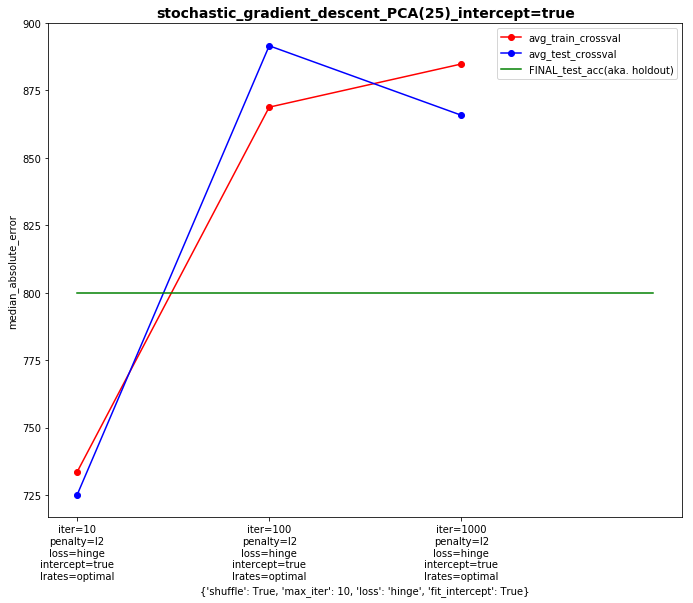

In [41]:
####################################################################################################################

# print best results ####################
print('{0:25}{1:23}{2}'.format('model', 'test_acc', 'best_hyperparams'))
print()
dictList = []

for key, value in models_results.items():
    temp = [key,value]
    dictList.append(temp)

# is better greater or smaller value ?
if(greater == True):
    dictList.sort(key=lambda e: e[1]['acc'], reverse=True) # acc is not mean test crovall acc ! but holdout acc
else:
    dictList.sort(key=lambda e: e[1]['acc'], reverse=False)

best_model = dictList[0][0] # best model at first position


# print and polt results
for item in dictList:
    print('{0:25}{1}\t{2}'.format(item[0], item[1]['acc'], item[1]['params']))
# ###################################### print/

# plot it all ######################
i = 1
plt.figure(figsize=(25,20))       # set dimensions of the figure
for model_name, result in results_to_plot.items():
    base_h_p = '\npenalty=l2\nloss=hinge\nintercept=true\nlrates=optimal'
    plt.subplot(2,2, i)         # create subplots on a grid with 2 rows and 2 columns
    plt.plot(['iter=10'+base_h_p, 'iter=100'+base_h_p, 'iter=1000'+base_h_p],result.cv_train_acc,'or-')
    plt.plot(result.cv_test_acc,'ob-')
    plt.plot([0,len(result.cv_test_acc)], [result.holdout_acc,result.holdout_acc],'g-')
    plt.xlabel('max_depth')
    plt.xlabel(models_results[model_name]['params'])

    plt.ylabel('median_absolute_error')
    plt.legend(['avg_train_crossval', 'avg_test_crossval','FINAL_test_acc(aka. holdout)'])
    plt.title(model_name+'_PCA(25)_intercept=true', fontsize=14, fontweight='bold')
    i +=1

plt.show()
best_params = models_results[best_model]['params'] # <-- may be different if you want to train
##################################### plot/

## 4.1 Result
* That looks promising!
* On the other hand, increasing error with iterations is very strange for me!
    * (maybe learning rate is causing it?)
    * edit. I'didnt realize that sdg is online, I thought thaht it use some batches... ok 1000*35000 was probalby to much
* ...lets try tune some more hyperparameters (I'm splitting the computation it due to high occurence of various errors and I don't want to loose my results...)

In [63]:
model_name = 'stochastic_gradient_descent'  
loss=['hinge', 'log', 'squared_hinge']
penalty = [ 'l2', 'l1', 'elasticnet']
max_iter = [10]
lrates = ['optimal']
param_comb = ParameterGrid({'loss': loss, 'max_iter' : max_iter, 'penalty':penalty, 'fit_intercept': [True], 'shuffle':[True]})

# train it
result = crosval_train(model_name, X, y, X_test, y_test, param_comb, num_fold, metric, greater)
results_to_plot[model_name+'_v2'] = result


# save best results
if greater:
    models_results[model_name+'_v2'] = {'acc': result.holdout_acc, 'params' : param_comb[np.argmax(result.cv_test_acc)]}
else:
    models_results[model_name+'_v2'] = {'acc': result.holdout_acc, 'params' : param_comb[np.argmin(result.cv_test_acc)]}

model                    	test_acc               best_hyperparams

stochastic_gradient_descent_v2	562.0		{'shuffle': True, 'penalty': 'elasticnet', 'max_iter': 10, 'loss': 'log', 'fit_intercept': True}
stochastic_gradient_descent	800.0		{'shuffle': True, 'max_iter': 10, 'loss': 'hinge', 'fit_intercept': True}


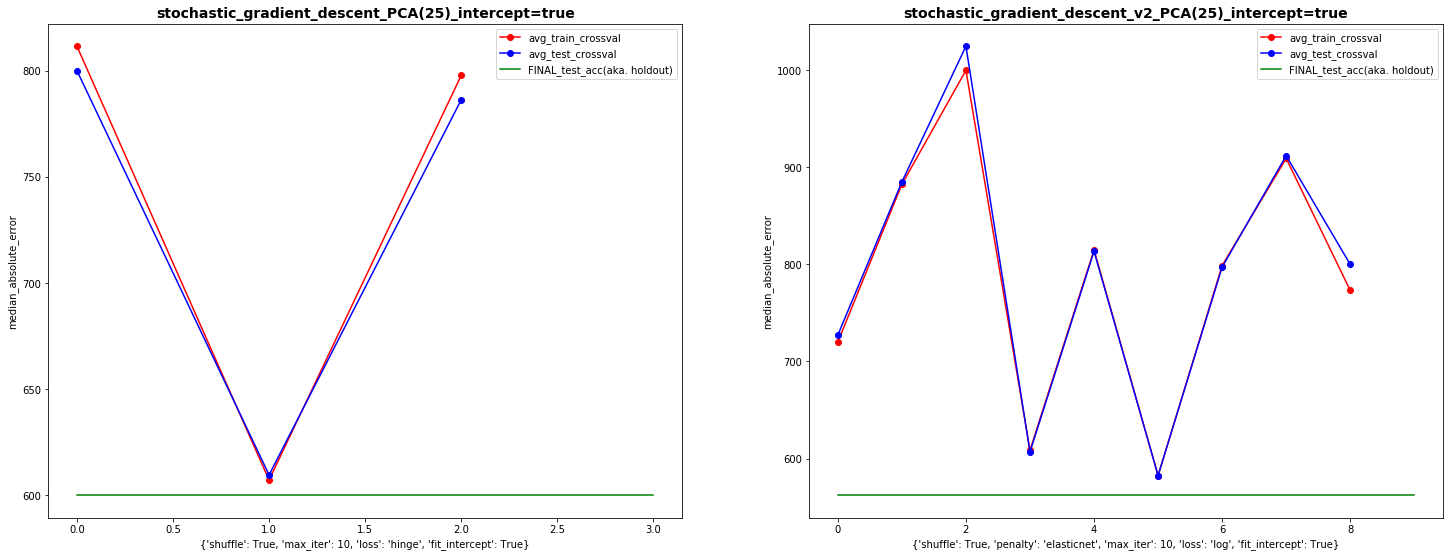

In [64]:
# print best results ####################
print('{0:25}\t{1:23}{2}'.format('model', 'test_acc', 'best_hyperparams'))
print()
dictList = []

for key, value in models_results.items():
    temp = [key,value]
    dictList.append(temp)

# is better greater or smaller value ?
if(greater == True):
    dictList.sort(key=lambda e: e[1]['acc'], reverse=True) # acc is not mean test crovall acc ! but holdout acc
else:
    dictList.sort(key=lambda e: e[1]['acc'], reverse=False)

best_model = dictList[0][0] # best model at first position


# print and polt results
for item in dictList:
    print('{0:25}\t{1}\t\t{2}'.format(item[0], item[1]['acc'], item[1]['params']))
# ###################################### print/

# plot it all ######################
i = 1
plt.figure(figsize=(25,20))       # set dimensions of the figure
for model_name, result in results_to_plot.items():
    base_h_p = '\npenalty=l2\nloss=hinge\nintercept=true\nlrates=optimal'
    plt.subplot(2,2, i)         # create subplots on a grid with 2 rows and 2 columns
    plt.plot(result.cv_train_acc,'or-')
    plt.plot(result.cv_test_acc,'ob-')
    plt.plot([0,len(result.cv_test_acc)], [result.holdout_acc,result.holdout_acc],'g-')
    plt.xlabel(models_results[model_name]['params'])

    plt.ylabel('median_absolute_error')
    plt.legend(['avg_train_crossval', 'avg_test_crossval','FINAL_test_acc(aka. holdout)'])
    plt.title(model_name+'_PCA(25)_intercept=true', fontsize=14, fontweight='bold')
    i +=1

plt.show()
best_params = models_results[best_model]['params'] # <-- may be different if you want to train
##################################### plot/

In [62]:
print (param_comb)

## 4.2 Looks pretty good, let's fine tune hyper number of steps
* finally we'll fine tune nuber of steps
* scikit creators experienced, that sdg usually converges after 10^6 steps
   * 40000 * 0,8 * 0,8 ~ 20 steps
   * we saw that 100 is too much. lets go between 10 and 50...
* ((sorry for such a fregmnted bad hyperparam tuning with such a small kfold etc...))
    * but my notebook is so slow and this is allready killing it
* side note. isn't there some scikit option to calculate errer after each X. nubmer of steps ?? that would help a lot

In [65]:
model_name = 'stochastic_gradient_descent'  
loss=['log']
penalty = ['elasticnet']
max_iter = [10, 20, 30, 40, 50]
lrates = ['optimal']
param_comb = ParameterGrid({'loss': loss, 'max_iter' : max_iter, 'penalty':penalty, 'fit_intercept': [True], 'shuffle':[True]})

# train it
result = crosval_train(model_name, X, y, X_test, y_test, param_comb, num_fold, metric, greater)
results_to_plot[model_name+'_v3'] = result


# save best results
if greater:
    models_results[model_name+'_v3'] = {'acc': result.holdout_acc, 'params' : param_comb[np.argmax(result.cv_test_acc)]}
else:
    models_results[model_name+'_v3'] = {'acc': result.holdout_acc, 'params' : param_comb[np.argmin(result.cv_test_acc)]}

model                    	test_acc               best_hyperparams

stochastic_gradient_descent_v3	545.0		{'shuffle': True, 'penalty': 'elasticnet', 'max_iter': 40, 'loss': 'log', 'fit_intercept': True}
stochastic_gradient_descent_v2	562.0		{'shuffle': True, 'penalty': 'elasticnet', 'max_iter': 10, 'loss': 'log', 'fit_intercept': True}
stochastic_gradient_descent	800.0		{'shuffle': True, 'max_iter': 10, 'loss': 'hinge', 'fit_intercept': True}


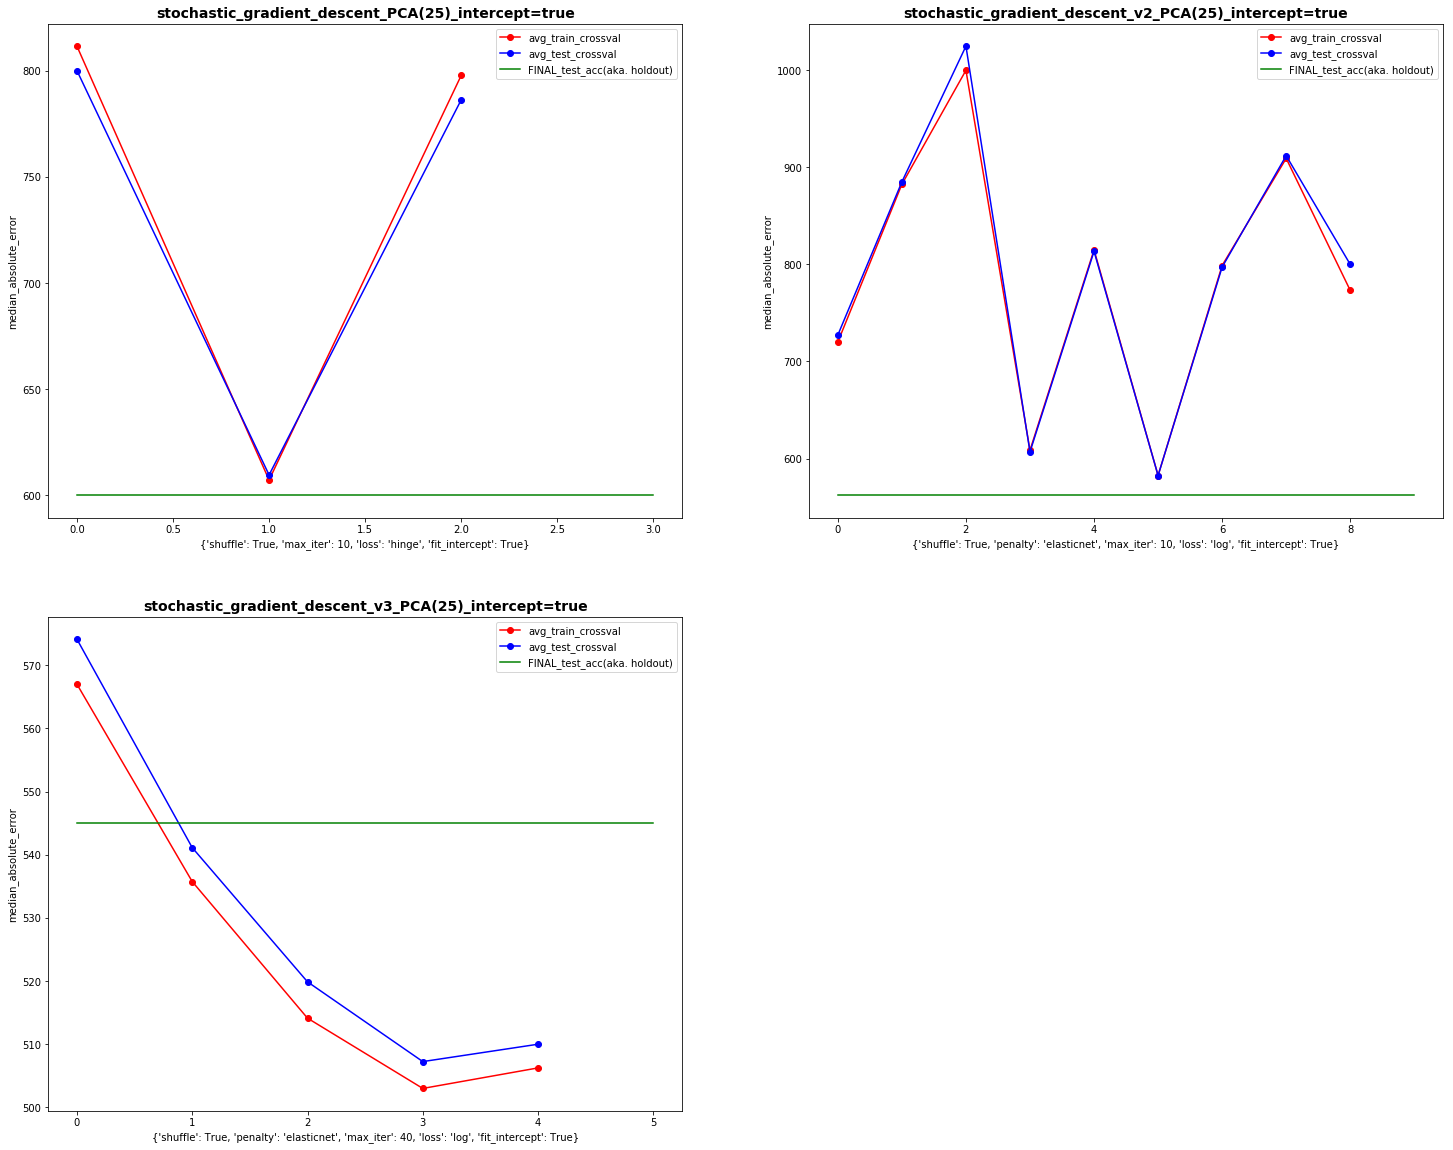

In [66]:
# print best results ####################
print('{0:25}\t{1:23}{2}'.format('model', 'test_acc', 'best_hyperparams'))
print()
dictList = []

for key, value in models_results.items():
    temp = [key,value]
    dictList.append(temp)

# is better greater or smaller value ?
if(greater == True):
    dictList.sort(key=lambda e: e[1]['acc'], reverse=True) # acc is not mean test crovall acc ! but holdout acc
else:
    dictList.sort(key=lambda e: e[1]['acc'], reverse=False)

best_model = dictList[0][0] # best model at first position


# print and polt results
for item in dictList:
    print('{0:25}\t{1}\t\t{2}'.format(item[0], item[1]['acc'], item[1]['params']))
# ###################################### print/

# plot it all ######################
i = 1
plt.figure(figsize=(25,20))       # set dimensions of the figure
for model_name, result in results_to_plot.items():
    base_h_p = '\npenalty=l2\nloss=hinge\nintercept=true\nlrates=optimal'
    plt.subplot(2,2, i)         # create subplots on a grid with 2 rows and 2 columns
    plt.plot(result.cv_train_acc,'or-')
    plt.plot(result.cv_test_acc,'ob-')
    plt.plot([0,len(result.cv_test_acc)], [result.holdout_acc,result.holdout_acc],'g-')
    plt.xlabel(models_results[model_name]['params'])

    plt.ylabel('median_absolute_error')
    plt.legend(['avg_train_crossval', 'avg_test_crossval','FINAL_test_acc(aka. holdout)'])
    plt.title(model_name+'_PCA(25)_intercept=true', fontsize=14, fontweight='bold')
    i +=1

plt.show()
best_params = models_results[best_model]['params'] # <-- may be different if you want to train
##################################### plot/

## 4.3 Final results
* Best result is 545 median abs. eror on testing set [508 avg corss val test]
* We reached best results with this setup:
    * 1. lineary reduce dim with PCA (to 25 features)
    * 2. Stochastic (Online) Gradient Descent (Linear regression) with this hyper. params
        * {'shuffle': True, 'penalty': 'elasticnet', 'max_iter': 40, 'loss': 'log', 'fit_intercept': True}
* iterations corresponds with expected convergence

### 4.3.1 Lets do the final model

In [38]:
best_params = {'shuffle': True, 'penalty': 'elasticnet', 'max_iter': 40, 'loss': 'log', 'fit_intercept': True}
best_model = 'stochastic_gradient_descent'


# DATA ###############################
X, X_test, y, y_test = load_data(standartize=True)

# PCA ################################
i = 25
pca = decomposition.PCA(n_components=i)
pca.fit(X)
X = pca.transform(X)
X_test = pca.transform(X_test)

# MODEL ##############################
model = get_model_old(best_model,best_params)
model.fit(X,y)
err_train = metrics.median_absolute_error(y, model.predict(X))
err_test  = metrics.median_absolute_error(y_test, model.predict(X_test))

print('Final result')
print('train error: {}'.format(err_train))
print('test  error: {}'.format(err_test))

Final result
train error: 506.0
test  error: 524.0


* Let's dump our model to the file

In [45]:
import pickle
pickle.dump( model, open( "best_model.p", "wb" ) )

* and checks everything is allright

In [52]:
loaded_model = pickle.load( open( "best_model.p", "rb" ) )

In [53]:
metrics.median_absolute_error(y_test, loaded_model.predict(X_test))

524.0

* looks good to me :-)
* I don't think I can go much better right now

### 4.3.2. Lets make some final score, maybe a bit worse, but a bit more realistic
* finaly we can crossvalidate our test score propper way!
* (this is still not propper way, because we've used some of data during hyperaparameter tuning, but I think its still more representative score than that above, because we'll properly scale and pca data inside cross validation)

In [60]:
t0 = time()

# data
df = pd.read_csv('data.csv')
df = df.drop(columns='url')
df.columns = [col.strip() for col in df.columns]
X = df.drop(columns = ['shares']) # all data
Y = df['shares']

# crossvalidate test score
folds = 10
  
kf = KFold(n_splits=folds, shuffle=False) 

 # e1 .. ek acc results
test_acc_results = []
train_acc_results = []

# K-fold cross validation
for train_index, test_index in kf.split(X):    
    
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # scale it here (am I doing this allright?)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train)
    X_test = pd.DataFrame(X_test)

    # pca it here (am I doing this allright?)
    i = 25
    pca = decomposition.PCA(n_components=i)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    model = get_model_old(best_model,best_params)
    model.fit(X_train, Y_train)

    
    # measure model
    train_acc_results.append( metrics.median_absolute_error(Y_train, loaded_model.predict(X_train)))
    test_acc_results.append( metrics.median_absolute_error(Y_test, loaded_model.predict(X_test)))

t1 = time()

# return mean of metric
print('total time: {} min'.format((t1 - t0)/60))
print('avg_train ,avg_test')
print (np.array(train_acc_results).mean(), np.array(test_acc_results).mean())

total time: 117.45917358001073 min
avg_train ,avg_test
647.95 647.8


* fair enough !

# 5. Summary and final thoughts
* what I didn't try:
    * Modify or create new features manually, maybe \**2 of some important lables... but i don't belive it could help much
    * delete some not equally sampled features befored manifold learing 
        * I tried plot some histograms, but it didn't help me much to determine which are distant
    * nn autoencoder for dimensionality reduction
    * nonlinear models - polynomial and logarmic base
    * svm
    
* It was sort of difficult
* My outputs are sort of bad
* Training part was exceptionaly long so the workflow was also very slow ...

### E-N-D ###